In [ ]:
# 信息熵
def calEnt(data):
    n = data.shape[0]
    i = data.iloc[:, -1].value_counts()
    p = i/n
    ent = 

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
wine = load_wine()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=.3, random_state=420)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9444444444444444

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['font.sans-serif']=['Hei']
plt.rcParams['axes.unicode_minus']=False 

In [7]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮',
                '非黄烷类酚类','花青素','颜色强度','色调',
                'od280/od315稀释葡萄酒','脯氨酸']

In [8]:
from sklearn import tree
import graphviz

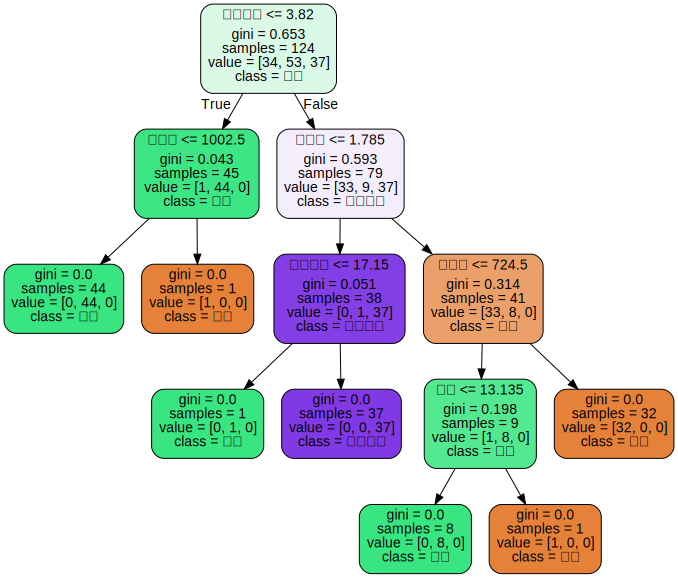

In [10]:
dot_data = tree.export_graphviz(clf, feature_names=feature_name, 
                                class_names=["琴酒","雪莉","贝尔摩德"], 
                            filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
# 特征重要性
clf.feature_importances_

array([0.02195225, 0.        , 0.        , 0.02404637, 0.        ,
       0.        , 0.39557682, 0.        , 0.        , 0.39720941,
       0.        , 0.        , 0.16121515])

In [12]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.02195224501537985),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.024046373651715403),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3955768217709794),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.39720941385141617),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16121514571050916)]

In [13]:
# 节点个数
clf.tree_.node_count

13

In [14]:
# 每一个几点对应的特征的索引值，-2表示的是叶节点
clf.tree_.feature

array([ 9, 12, -2, -2,  6,  3, -2, -2, 12,  0, -2, -2, -2])

In [15]:
clf = DecisionTreeClassifier(random_state=30, splitter='random')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9444444444444444

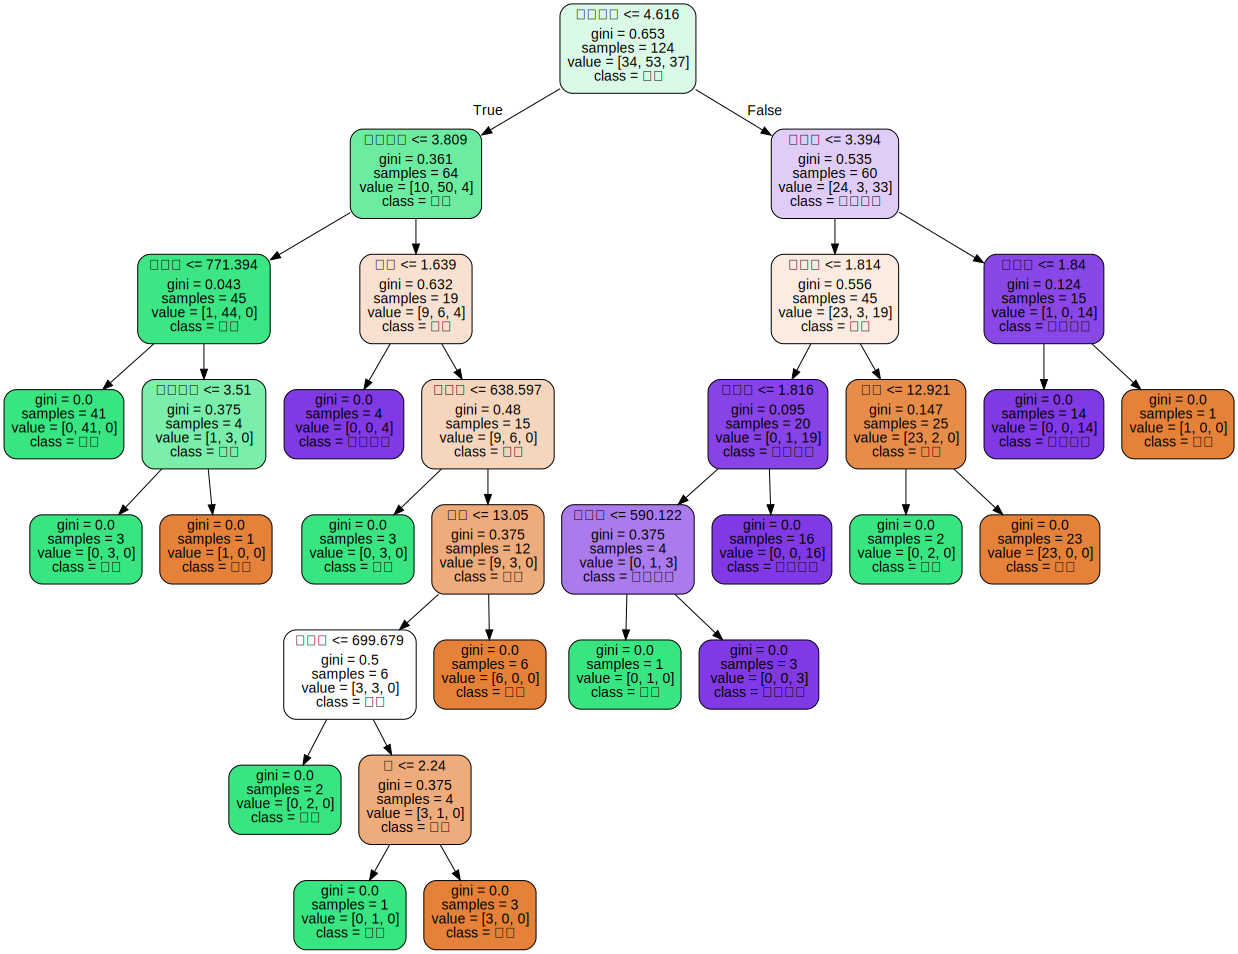

In [16]:
dot_data = tree.export_graphviz(clf, feature_names=feature_name, 
                                class_names=["琴酒","雪莉","贝尔摩德"], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# 剪枝参数


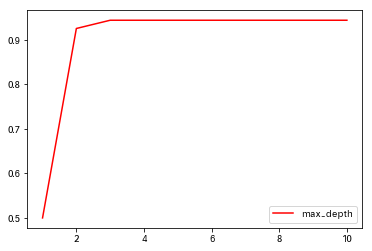

In [17]:
score = []
for i in range(10):
    clf = DecisionTreeClassifier(max_depth=i+1, 
                                 criterion='gini', 
                                 random_state=30)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))

plt.plot(range(1, 11), score, c='red', label='max_depth')
plt.legend()
plt.show()

In [18]:
# 样本不平衡
from sklearn.datasets import make_blobs

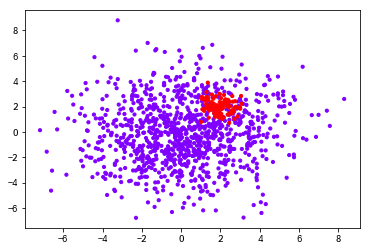

In [19]:
class_1 = 1000 #类别1有1000个样本
class_2 = 100 #类别2只有100个
centers = [[0,0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [2.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=420,shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, random_state=420)

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
wclf = DecisionTreeClassifier(class_weight='balanced')
wclf.fit(X_train, y_train)
wclf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
clf.score(X_test, y_test)

0.8954545454545455

In [25]:
wclf.score(X_test, y_test)

0.9090909090909091

In [28]:
# 混淆矩阵
# precision 精确度
(y_test[y_test == clf.predict(X_test)] == 1).sum()/(clf.predict(X_test) == 1).sum()

0.6363636363636364

In [29]:
(y_test[y_test == wclf.predict(X_test)] == 1).sum()/(wclf.predict(X_test) == 1).sum()

0.68

In [31]:
# recal 召回率
(y_test[y_test == clf.predict(X_test)] == 1).sum()/(y_test == 1).sum()

0.4827586206896552

In [32]:
(y_test[y_test == wclf.predict(X_test)] == 1).sum()/(y_test == 1).sum()

0.5862068965517241

In [33]:
# f-measure
p1 = (y_test[y_test == clf.predict(X_test)] == 1).sum()/(clf.predict(X_test) == 1).sum()
p2 = (y_test[y_test == wclf.predict(X_test)] == 1).sum()/(wclf.predict(X_test) == 1).sum()

In [34]:
r1 = (y_test[y_test == clf.predict(X_test)] == 1).sum()/(y_test == 1).sum()
r2 = (y_test[y_test == wclf.predict(X_test)] == 1).sum()/(y_test == 1).sum()

In [35]:
f1 = 2*p1*r1/(p1+r1)
f1

0.5490196078431373

In [36]:
f2 = 2*p2*r2/(p2+r2)
f2

0.6296296296296295

In [37]:
from sklearn import metrics

In [38]:
ypred = wclf.predict(X_test)

In [39]:
# accuracy
metrics.accuracy_score(y_test, ypred)

0.9090909090909091

In [40]:
# precision
metrics.precision_score(y_test, ypred)

0.68

In [41]:
# recall
metrics.recall_score(y_test, ypred)

0.5862068965517241

In [42]:
# f1
metrics.f1_score(y_test, ypred)

0.6296296296296295

In [43]:
# 网格搜索
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    test_size=.3, random_state=420)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# 设置参数可取值
param_grid = {'criterion': ['entropy', 'gini'], 
              'max_depth': range(2, 11), 
              'min_samples_split': range(2, 20 ,2), 
              'min_samples_leaf': range(1, 10)}
# 设置参数网格
reg = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# 建模
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 11), 'min_samples_split': range(2, 20, 2), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
# 最优参数
reg.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [47]:
reg.best_score_

0.9435483870967742

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, 
                             min_samples_leaf=5, min_samples_split=10)
clf.fit(X_train, y_train)
clf.score(X_test)